In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

### Working on DataSet
#### Dataset : California housing data

In [2]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

#### Spliting dataset in train, validation and test set

In [20]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

#### Scaling dataset

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

### Creating Model using Functional API

- We will use Wide & Deep neural network developed by "Heng-Tze Cheng".     
- It connects all or part of inputs directly to the output layer.
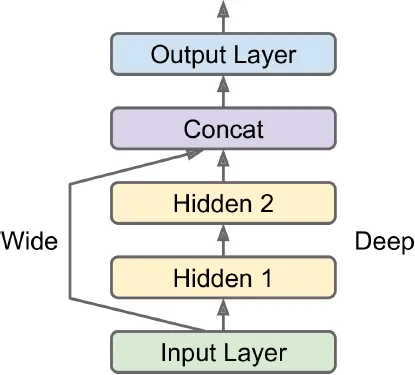

#### Reason for doing this:
A regular MLP (Multilayer Perceptron) forces all the data to flow through the full stacks of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations

In [9]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) #creating an Input object
hidden1 = keras.layers.Dense(30, activation='relu')(input_) #Dense layer with 30 neurons using Relu activation funtion.
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat) #only single neuron with no activation function
model = keras.Model(inputs=[input_],outputs=[output]) #Create a keras model specifying whoch inputs and outputs to use

#### Note: 
Above you can notice in hidden1, hidden2, concat etc.. as soon as it is created, we call it like a function, passing it the input. This is why its called Functional API

In [10]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [11]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.8260 - val_loss: 20.5063
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 9.9421 - val_loss: 6.2247
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6065 - val_loss: 0.9906
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5696 - val_loss: 1.1440
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5817 - val_loss: 1.8041
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3639 - val_loss: 2.0882
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5149 - val_loss: 1.7916
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3379 - val_loss: 1.5773
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3451 - val_loss: 2.2005
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5410 - val_loss: 2.290

In [12]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 723us/step - loss: 0.4208


In [13]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[1.3060695],
       [1.4481525],
       [2.5646055]], dtype=float32)

In [14]:
y_act = y_test[:3]
y_act

array([1.026, 1.12 , 1.985])

### Creating a model using different approach

Here we will send a subset of the features through the wide path and a different subset through deep path. We will use multiple inputs. 
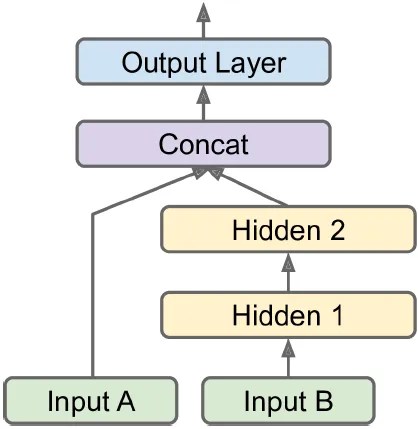

In [17]:
input_a = keras.layers.Input(shape=[5], name = 'wide_input')
input_b = keras.layers.Input(shape=[6], name = 'deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_b)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_a, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_a,input_b], outputs=[output])

In [18]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=0.001))

In [22]:
X_train_a, X_train_b = X_train[:, :5], X_train[:, 2:]
X_valid_a, X_valid_b = X_valid[:, :5], X_valid[:, 2:]
X_test_a, X_test_b = X_test[:, :5], X_test[:, 2:]
X_new_a, X_new_b = X_test_a[:3], X_test_b[:3]

In [26]:
history = model.fit((X_train_a, X_train_b),y_train,epochs=20,validation_data=((X_valid_a,X_valid_b),y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.8930 - val_loss: 1.1928
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9837 - val_loss: 0.8478
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7540 - val_loss: 0.7528
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6773 - val_loss: 0.7003
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6398 - val_loss: 0.6627
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6074 - val_loss: 0.6307
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5800 - val_loss: 0.6008
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5602 - val_loss: 0.5783
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5486 - val_loss: 0.5562
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5380 - val_loss: 0.5425

In [32]:
mse_test = model.evaluate((X_test_a, X_test_b), y_test)

162/162 [==============================] - 0s 847us/step - loss: 0.4805


In [33]:
y_pred = model.predict((X_new_a, X_new_b))

In [34]:
y_pred

array([[2.386732 ],
       [1.9545181],
       [1.033367 ]], dtype=float32)

In [35]:
y_act = y_test[:3]
y_act

array([3.75 , 1.755, 0.888])